# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***



<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


You can generate random numbers with `torch.rand()`. You can change the shape of an array with `.reshape()`. Many of the mathematical functions of NumPy have a torch equivalent.

In [112]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.4604, 0.4893, 0.9195, 0.9316, 0.0252, 0.5028],
        [0.4622, 0.0502, 0.5303, 0.1542, 0.6111, 0.7979],
        [0.6645, 0.5448, 0.2717, 0.1135, 0.0966, 0.8940],
        [0.5725, 0.0748, 0.5498, 0.1650, 0.8833, 0.4523]])

In [113]:
b.shape

torch.Size([4, 6])

In [114]:
b.mean()

tensor(0.4674)

In [115]:
b.mean(axis=0)

tensor([0.5399, 0.2898, 0.5678, 0.3411, 0.4040, 0.6618])

We can add an extra dimension with a size of 1 using `.unsqueeze()`.

In [116]:
b.shape

torch.Size([4, 6])

In [117]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [118]:
b.shape

torch.Size([4, 6])

In [119]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [120]:
#b+a

We can add a dimension of size 1 with `.unsqeeze()`

In [121]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [122]:
b+A

tensor([[1.4604, 1.4893, 1.9195, 1.9316, 1.0252, 1.5028],
        [1.4622, 1.0502, 1.5303, 1.1542, 1.6111, 1.7979],
        [1.6645, 1.5448, 1.2717, 1.1135, 1.0966, 1.8940],
        [1.5725, 1.0748, 1.5498, 1.1650, 1.8833, 1.4523]])

We can get rid of a dimension of size 1 with `.squeeze()`

In [126]:
A.shape, A.squeeze().shape

(torch.Size([4, 1]), torch.Size([4]))

We can change the order of the dimensions in a tensor with `.permute()`

In [127]:
b.shape

torch.Size([4, 6])

In [128]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.7204, 0.7230, 0.0542, 0.6271, 0.4519, 0.7301],
         [0.9072, 0.2262, 0.7039, 0.4892, 0.7907, 0.9364],
         [0.0568, 0.5600, 0.4219, 0.3345, 0.9204, 0.1896],
         [0.3873, 0.8974, 0.2967, 0.2458, 0.4260, 0.4141]],

        [[0.8690, 0.6897, 0.9347, 0.8341, 0.6198, 0.5166],
         [0.5257, 0.8064, 0.3829, 0.8987, 0.1725, 0.9528],
         [0.6159, 0.7583, 0.9904, 0.8842, 0.0278, 0.0506],
         [0.9176, 0.6748, 0.0384, 0.5569, 0.0403, 0.2382]],

        [[0.9055, 0.0169, 0.8908, 0.8523, 0.1661, 0.4952],
         [0.0905, 0.1144, 0.0173, 0.5092, 0.4874, 0.5321],
         [0.2591, 0.4577, 0.2682, 0.2839, 0.6477, 0.1536],
         [0.2459, 0.3105, 0.4591, 0.4153, 0.7459, 0.0948]]])

In [129]:
b.shape

torch.Size([3, 4, 6])

In [130]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [20]:
b = torch.rand(10)
b

tensor([0.4446, 0.3152, 0.3288, 0.0775, 0.0373, 0.8833, 0.5619, 0.2753, 0.6291,
        0.7293])

In [21]:
torch.cuda.is_available()

True

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [23]:
b

tensor([0.4446, 0.3152, 0.3288, 0.0775, 0.0373, 0.8833, 0.5619, 0.2753, 0.6291,
        0.7293])

In [24]:
b = b.to(device)

In [25]:
b

tensor([0.4446, 0.3152, 0.3288, 0.0775, 0.0373, 0.8833, 0.5619, 0.2753, 0.6291,
        0.7293], device='cuda:0')

In [26]:
b = b.to("cpu")
b

tensor([0.4446, 0.3152, 0.3288, 0.0775, 0.0373, 0.8833, 0.5619, 0.2753, 0.6291,
        0.7293])

In [27]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [28]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [29]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training a model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [30]:
fn = "../data/animal_speed.npy"

In [31]:
speed = np.load(fn)
speed = speed[0:100]

In [32]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

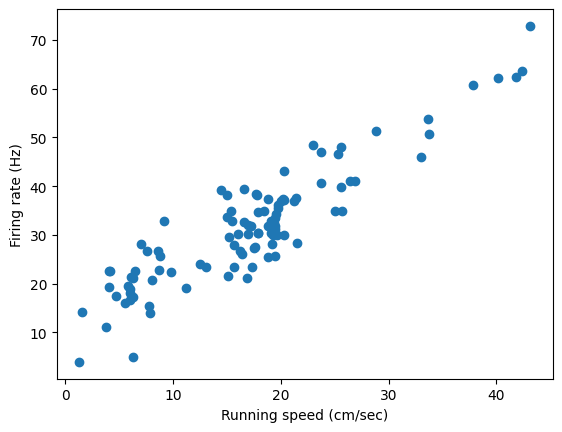

In [33]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$

We will create our model by defining a class. 

There are simpler ways to create simple models in pytorch. But the way presented here is the very flexible. We can create all our models by just modifying our class.

<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [34]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

In [35]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [36]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[0.2900]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.6019], requires_grad=True)


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [37]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [38]:
import torch.optim as optim

In [39]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

## Data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

X: Input data, the first dimension (rows) is for the observations. The second dimension is for features. We only have 1 input feature (speed), so the second dimension will have a size of 1.

y: The first dimension (rows) is for the observations. The second is for the output features. In this case, we have one output feature (firing rate)

In [90]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [91]:
X.shape

torch.Size([27304, 1])

In [92]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([27304, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [43]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[0.2900]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.6019], requires_grad=True)


In [44]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


In [45]:
yhat = lin_model(X)

In [46]:
loss = loss_fn(yhat,y)

In [47]:
optimizer.zero_grad() # zero the gradients

In [48]:
loss.backward() # calculate gradients

In [49]:
optimizer.step() # will change the model parameters to reduce the loss        

In [50]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.3774]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.5473], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [51]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [52]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 102.17371368408203
Epoch: 1, Loss: 55.260169982910156
Epoch: 2, Loss: 52.2724609375
Epoch: 3, Loss: 52.06190490722656
Epoch: 4, Loss: 52.02694320678711
Epoch: 5, Loss: 52.003108978271484
Epoch: 6, Loss: 51.97999954223633
Epoch: 7, Loss: 51.95695877075195
Epoch: 8, Loss: 51.933929443359375
Epoch: 9, Loss: 51.91092300415039
Epoch: 1000, Loss: 36.618202209472656
Epoch: 2000, Loss: 30.101835250854492
Epoch: 3000, Loss: 27.36236572265625
Epoch: 4000, Loss: 26.21068572998047
Epoch: 5000, Loss: 25.726530075073242
Epoch: 6000, Loss: 25.522993087768555
Epoch: 7000, Loss: 25.437421798706055
Epoch: 8000, Loss: 25.401453018188477
Epoch: 9000, Loss: 25.386329650878906
Epoch: 10000, Loss: 25.379972457885742
Epoch: 11000, Loss: 25.377300262451172
Epoch: 12000, Loss: 25.376171112060547
Epoch: 13000, Loss: 25.375699996948242
Epoch: 14000, Loss: 25.375503540039062
Epoch: 15000, Loss: 25.37541961669922
Epoch: 16000, Loss: 25.375389099121094
Epoch: 17000, Loss: 25.3753719329834
Epoch: 1800

In [53]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5676], requires_grad=True)


In [54]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [55]:
lin_yhat = lin_model(t_range)

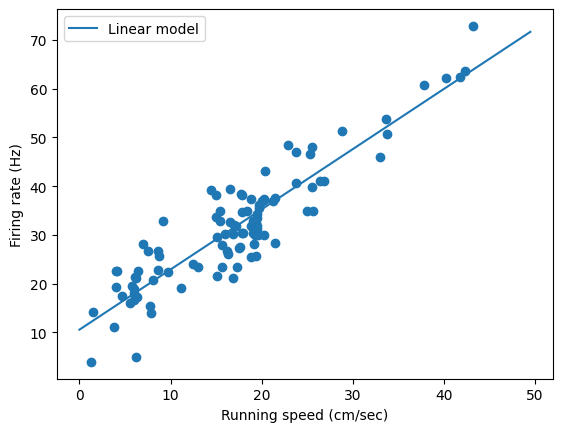

In [56]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

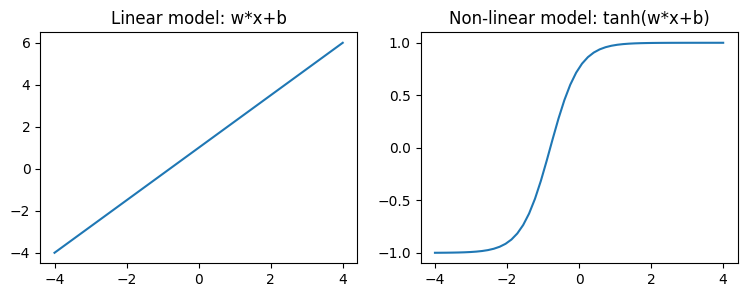

In [57]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [58]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [59]:
nn_model = NN_model()

In [60]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.3666],
        [-0.6571],
        [ 0.3982],
        [-0.9849],
        [-0.3623]], requires_grad=True)
layer1.bias Parameter containing:
tensor([0.0414, 0.4275, 0.8799, 0.0347, 0.1788], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.1774, -0.3052,  0.0762,  0.1314,  0.2589]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.0378], requires_grad=True)


In [61]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [62]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [63]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1143.852783203125
Epoch: 1, Loss: 1141.483642578125
Epoch: 2, Loss: 1139.1201171875
Epoch: 3, Loss: 1136.76220703125
Epoch: 4, Loss: 1134.4100341796875
Epoch: 5, Loss: 1132.0631103515625
Epoch: 6, Loss: 1129.7220458984375
Epoch: 7, Loss: 1127.3863525390625
Epoch: 8, Loss: 1125.05615234375
Epoch: 9, Loss: 1122.7313232421875
Epoch: 1000, Loss: 234.0653533935547
Epoch: 2000, Loss: 120.03418731689453
Epoch: 3000, Loss: 86.74728393554688
Epoch: 4000, Loss: 72.81909942626953
Epoch: 5000, Loss: 64.1562271118164
Epoch: 6000, Loss: 65.60418701171875
Epoch: 7000, Loss: 84.15369415283203
Epoch: 8000, Loss: 57.70915985107422
Epoch: 9000, Loss: 65.12181091308594
Epoch: 10000, Loss: 55.313865661621094
Epoch: 11000, Loss: 77.14190673828125
Epoch: 12000, Loss: 56.033714294433594
Epoch: 13000, Loss: 45.660831451416016
Epoch: 14000, Loss: 42.1269645690918
Epoch: 15000, Loss: 39.8748664855957
Epoch: 16000, Loss: 38.20014953613281
Epoch: 17000, Loss: 36.8974494934082
Epoch: 18000, Loss: 35

In [64]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.0709],
        [-0.1033],
        [ 0.5232],
        [-0.7837],
        [-0.1804]], requires_grad=True)
layer1.bias Parameter containing:
tensor([0.0853, 0.9358, 0.7805, 0.4289, 4.8019], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 9.3628, -9.2667,  9.3834, -9.2049, -9.5518]], requires_grad=True)
layer2.bias Parameter containing:
tensor([9.2619], requires_grad=True)


### Let's compare our linear model with our small neural network

In [65]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [66]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

To plot the `yhat` tensors, we need to call `.detach()` because the tensor have associated gradients.

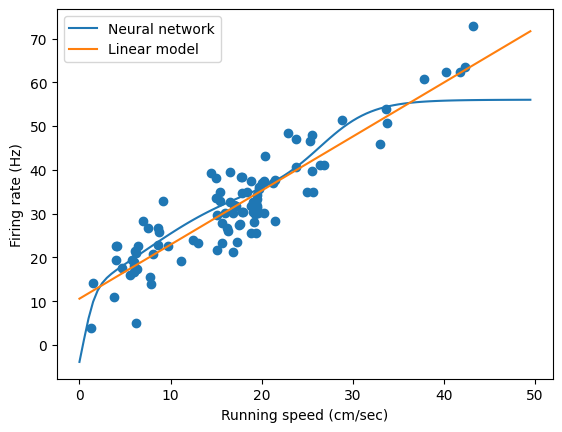

In [67]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [68]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


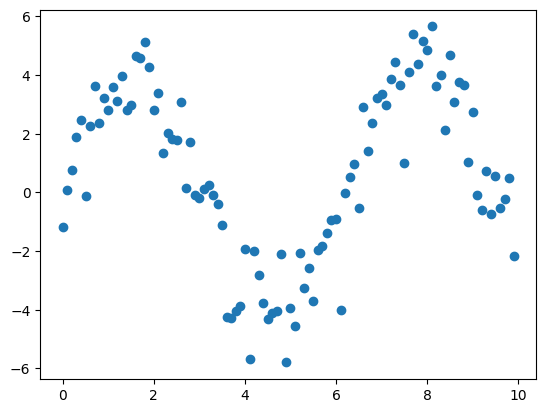

In [69]:
plt.scatter(X.numpy(),y.numpy())

In [70]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 316.8887023925781
Epoch: 1, Loss: 25.424116134643555
Epoch: 2, Loss: 23.467002868652344
Epoch: 3, Loss: 21.831819534301758
Epoch: 4, Loss: 20.446191787719727
Epoch: 5, Loss: 19.258241653442383
Epoch: 6, Loss: 18.22967529296875
Epoch: 7, Loss: 17.331628799438477
Epoch: 8, Loss: 16.541833877563477
Epoch: 9, Loss: 15.84284782409668
Epoch: 1000, Loss: 6.661169052124023
Epoch: 2000, Loss: 6.444484233856201
Epoch: 3000, Loss: 6.198763370513916
Epoch: 4000, Loss: 5.907690048217773
Epoch: 5000, Loss: 5.580855846405029
Epoch: 6000, Loss: 5.266438007354736
Epoch: 7000, Loss: 5.772140979766846
Epoch: 8000, Loss: 5.882437705993652
Epoch: 9000, Loss: 5.827786445617676
Epoch: 10000, Loss: 4.0105204582214355
Epoch: 11000, Loss: 3.352097749710083
Epoch: 12000, Loss: 2.9696481227874756
Epoch: 13000, Loss: 2.6714797019958496
Epoch: 14000, Loss: 2.518842935562134
Epoch: 15000, Loss: 2.438610792160034
Epoch: 16000, Loss: 2.382640838623047
Epoch: 17000, Loss: 2.4116835594177246
Epoch: 18000

In [71]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 275.4789733886719
Epoch: 1, Loss: 243.8191375732422
Epoch: 2, Loss: 216.26693725585938
Epoch: 3, Loss: 192.28897094726562
Epoch: 4, Loss: 171.4212646484375
Epoch: 5, Loss: 153.25994873046875
Epoch: 6, Loss: 137.45367431640625
Epoch: 7, Loss: 123.69664764404297
Epoch: 8, Loss: 111.72283172607422
Epoch: 9, Loss: 101.30068969726562
Epoch: 1000, Loss: 17.204614639282227
Epoch: 2000, Loss: 11.7915678024292
Epoch: 3000, Loss: 9.785411834716797
Epoch: 4000, Loss: 9.041903495788574
Epoch: 5000, Loss: 8.766349792480469
Epoch: 6000, Loss: 8.664226531982422
Epoch: 7000, Loss: 8.62637710571289
Epoch: 8000, Loss: 8.612350463867188
Epoch: 9000, Loss: 8.607151985168457
Epoch: 10000, Loss: 8.605224609375
Epoch: 11000, Loss: 8.604511260986328
Epoch: 12000, Loss: 8.604246139526367
Epoch: 13000, Loss: 8.604147911071777
Epoch: 14000, Loss: 8.604111671447754
Epoch: 15000, Loss: 8.604098320007324
Epoch: 16000, Loss: 8.604092597961426
Epoch: 17000, Loss: 8.60409164428711
Epoch: 18000, Loss: 8

In [72]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [73]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

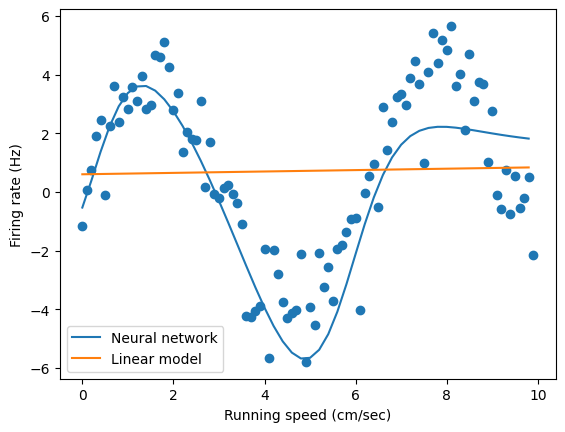

In [74]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

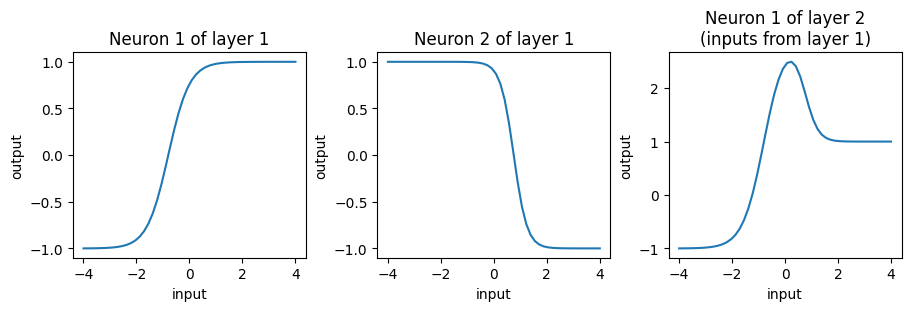

In [75]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [76]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [77]:
dnn_model = DNN_model()

In [78]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.6709],
        [-0.1467],
        [-0.9978],
        [ 0.0341],
        [-0.4243],
        [-0.1058],
        [ 0.5412],
        [ 0.5292],
        [ 0.1353],
        [-0.1655]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.9898,  0.1418, -0.9909, -0.9756,  0.5817, -0.8508,  0.7608, -0.0718,
         0.0951,  0.5034], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 0.0607,  0.1173,  0.0285,  0.2032,  0.2478,  0.0851, -0.0707, -0.3058,
          0.0213, -0.0878],
        [ 0.2624,  0.2687, -0.1470, -0.0668, -0.0460,  0.1715, -0.0315, -0.2119,
          0.1396, -0.1708],
        [ 0.0138, -0.2447, -0.0691,  0.0969,  0.0890, -0.2317,  0.2949, -0.2669,
         -0.2005,  0.0398],
        [-0.2375,  0.2431, -0.2611, -0.2882, -0.0451, -0.0785, -0.1843, -0.0221,
         -0.1028,  0.1426],
        [ 0.2920, -0.0521,  0.0963, -0.2670,  0.0789, -0.1865,  0.1505,  0.2551,
          0.2726,  0.2416],
        [-0

In [79]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [80]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 9.296996116638184
Epoch: 1, Loss: 9.2871732711792
Epoch: 2, Loss: 9.277530670166016
Epoch: 3, Loss: 9.26806640625
Epoch: 4, Loss: 9.258777618408203
Epoch: 5, Loss: 9.249656677246094
Epoch: 6, Loss: 9.240703582763672
Epoch: 7, Loss: 9.231914520263672
Epoch: 8, Loss: 9.223285675048828
Epoch: 9, Loss: 9.214813232421875
Epoch: 1000, Loss: 8.556158065795898
Epoch: 2000, Loss: 8.256516456604004
Epoch: 3000, Loss: 7.889741897583008
Epoch: 4000, Loss: 7.535804271697998
Epoch: 5000, Loss: 6.84383487701416
Epoch: 6000, Loss: 5.032167434692383
Epoch: 7000, Loss: 3.6096341609954834
Epoch: 8000, Loss: 3.0029900074005127
Epoch: 9000, Loss: 2.740734577178955
Epoch: 10000, Loss: 2.610152006149292
Epoch: 11000, Loss: 2.5276689529418945
Epoch: 12000, Loss: 2.4693400859832764
Epoch: 13000, Loss: 2.4253389835357666
Epoch: 14000, Loss: 2.3898098468780518
Epoch: 15000, Loss: 2.3592476844787598
Epoch: 16000, Loss: 2.331817388534546
Epoch: 17000, Loss: 2.3067877292633057
Epoch: 18000, Loss: 2.

In [81]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

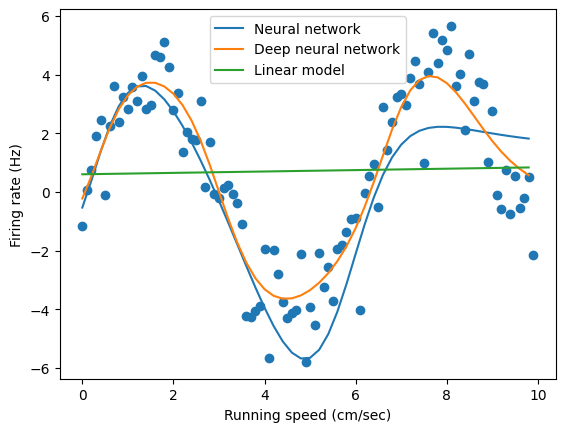

In [82]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.

The X tensor will have to have a shape of (27304,2)


In [83]:
fn = "../data/animal_acceleration.npy"
acceleration = np.load(fn)

fn = "../data/animal_speed.npy"
speed = np.load(fn)

fn =  "../data/y_rate.npy"
rate = np.load(fn)

In [89]:
rate.shape

(27304,)

Text(0, 0.5, 'Firing rate (Hz)')

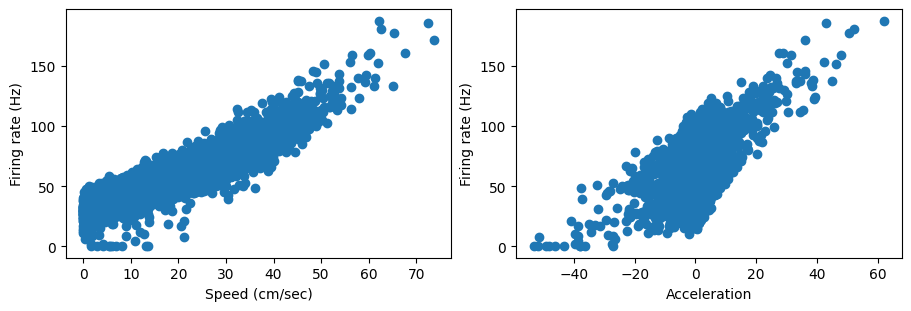

In [87]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

ax[0].scatter(speed,rate)
ax[0].set_xlabel("Speed (cm/sec)")
ax[0].set_ylabel("Firing rate (Hz)")
ax[1].scatter(acceleration,rate)
ax[1].set_xlabel("Acceleration")
ax[1].set_ylabel("Firing rate (Hz)")